<b>
<p>
<center>
<font size="7">
Facial Expression Recognition
</font>
</center>
</p>

<p>
<center>
<font size="5">
Final Project of Machine Learning
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Team:Brunda Mariswamy,Lakshmi Sravya Chalapati,Satya Bharath Reddy Duvvi
</font>
</center>
</p>    

# **Introduction**
Facial expression recognition is the process of identifying human emotion.This 
is both something that humans do automatically but computational methodologies have also been developed.

In the facial recognition application faces are matches with the available dataset to find out the human faces. These application are mostly used in the biometric, government cyber security areas. In the chat boats system or the system which interact with human should train with the emotion recognition of the human so that the resultant action should be a appropriate these application can be used in many places like in digital cameras, where on the smile expression the image captured operation will perform or in case of the automation system according to mood the system or robot will interact with human.
















## **Why Emotion Detection?**

 - The motivation behind choosing this topic specifically lies in the huge   investments large corporations do in feedbacks and surveys but fail to get equitable response on their investments

- Emotion Detection through facial gestures is a technology that aims to improve product and services performance by monitoring customer behavior to certain products or service staff by their evaluations.

Examples:
- While Disney uses emotion-detection tech to find out opinion on a completed
project, other brands have used it to directly inform advertising and digital
marketing.
- Kellogg's is just one high-profile example, having used Affectiva's software to test audience reaction to ads for its cereal.
- Unilever does this, using HireVue's Al-powered technology to screen prospective candidates based on factors like body language and mood. In doing so, the company is able to find the person whose personality and characteristics are best suited to the job.

### **Load Libraries**

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/ML_Project/'

abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/ML_Project/Utilities/p3_deep_learning/'



Mounted at /content/drive


In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import cv2
import seaborn as sns
%matplotlib inline

import keras
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from collections import Counter




## **About the dataset**
 - The data set is sourced from Kaggle Competition [Facial Expression Recognition Challenge](https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/data)
 - The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. 
 - The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
 - train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 
 - The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.
 - The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.
 - This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

In [5]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/ML_Project/Utilities/p3_deep_learning


## **Data Preprocessing**

### **Loading the Dataset**

In [6]:
# Implement me
import pandas as pd

# Load the raw training data
data = pd.read_csv(abspath_curr + 'Project/icml_face_data.csv',header=0)
train = pd.read_csv(abspath_curr +'Project/train.csv',header=0)
test = pd.read_csv(abspath_curr +'Project/test.csv',header=0)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [9]:
# target
target = 'emotion'

In [10]:
#Before checking count before removing duplicates
data.count()

emotion    35887
 Usage     35887
 pixels    35887
dtype: int64

In [11]:
#Check for duplicates
#First copy data into new dataframe
newdata = data.copy()
newdata.drop_duplicates(inplace=True)
newdata.count()

#From result we see that dataset has no duplicates

emotion    34653
 Usage     34653
 pixels    34653
dtype: int64

Found few duplicate records hence we dropped the duplicate rows and the count of dataset after removing duplicate is 34653

In [12]:
#checking for the different class lables for the Usage class
newdata[' Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [13]:
#Checking for the counts of each classlabels
newdata[' Usage'].value_counts()


Training       27515
PrivateTest     3574
PublicTest      3564
Name:  Usage, dtype: int64

In [14]:
#Renaming each class lables 
train_data = newdata[newdata[' Usage']=='Training']
val_data = newdata[newdata[' Usage']=='PrivateTest']
test_data = newdata[newdata[' Usage']=='PublicTest']

In [15]:
#Counts of each class labels
train_data.shape,test_data.shape,val_data.shape

((27515, 3), (3564, 3), (3574, 3))

In [16]:
import collections
import imblearn
oversampler = imblearn.over_sampling.RandomOverSampler()

In [17]:
#Count of each classlables in Training data for emtion class
collections.Counter(train_data['emotion'])

Counter({0: 3849, 2: 3909, 4: 4733, 6: 4874, 3: 7087, 5: 2682, 1: 381})

In [18]:
#Assigning name each emotions which is labelled as integer to Text for easy understanding
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

[Text(0, 0, 'Angry'),
 Text(1, 0, 'Disgust'),
 Text(2, 0, 'Fear'),
 Text(3, 0, 'Happy'),
 Text(4, 0, 'Sad'),
 Text(5, 0, 'Surprise'),
 Text(6, 0, 'Neutral')]

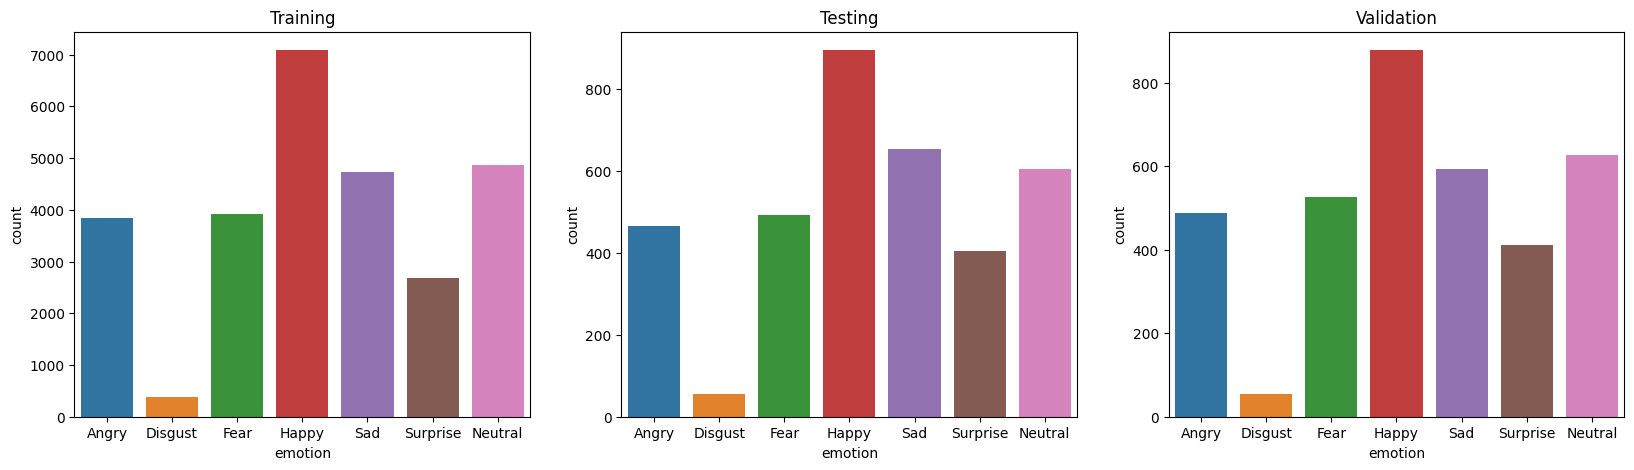

In [19]:
#Plots for Train,Test,Validation data
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
sns.countplot(data = newdata[newdata[' Usage']=='Training'], x='emotion', ax=ax1).set_title('Training')
ax1.set_xticklabels(emotions.values())
sns.countplot(data = newdata[newdata[' Usage']=='PublicTest'], x='emotion', ax=ax2).set_title('Testing')
ax2.set_xticklabels(emotions.values())
sns.countplot(data = newdata[newdata[' Usage']=='PrivateTest'], x='emotion', ax=ax3).set_title('Validation')
ax3.set_xticklabels(emotions.values())

In [20]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

  
def sample_plot(x,y=None):
    #x, y are numpy arrays
    n = 20
    samples = random.sample(range(x.shape[0]),n)
    
    fig, axs = plt.subplots(2,10, figsize=(25,5), sharex=True, sharey=True)
    ax = axs.ravel()
    for i in range(n):
        ax[i].imshow(x[samples[i],:,:], cmap=plt.get_cmap('gray'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if y is not None:
            ax[i].set_title(emotions[y[samples[i]]])

def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
           


def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

In [21]:
#Define training, validation and test data:
#Separating images and lables from the data for Train,Test,Validation
train_image_array1, train_image_label1 = prepare_data(newdata[newdata[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(newdata[newdata[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(newdata[newdata[' Usage']=='PublicTest'])

In [22]:
train_images = train_image_array1.reshape((train_image_array1.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')

In [23]:
train_labels = tf.keras.utils.to_categorical(train_image_label1)
val_labels = tf.keras.utils.to_categorical(val_image_label)
test_labels = tf.keras.utils.to_categorical(test_image_label)

## **Compare plots**

Training and validation plots 

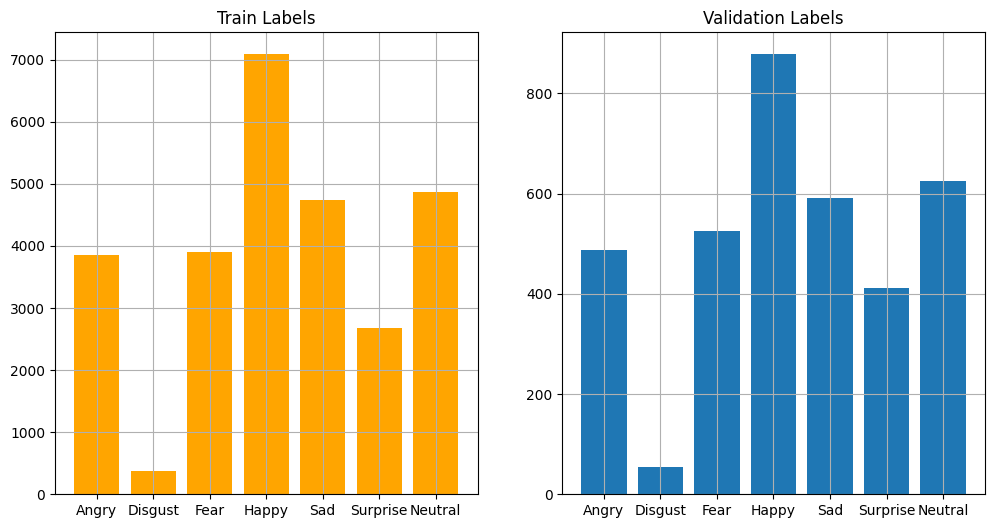

In [24]:
plot_compare_distributions(train_labels, val_labels, title1='Train Labels', title2='Validation Labels')

Training and Testing plots 

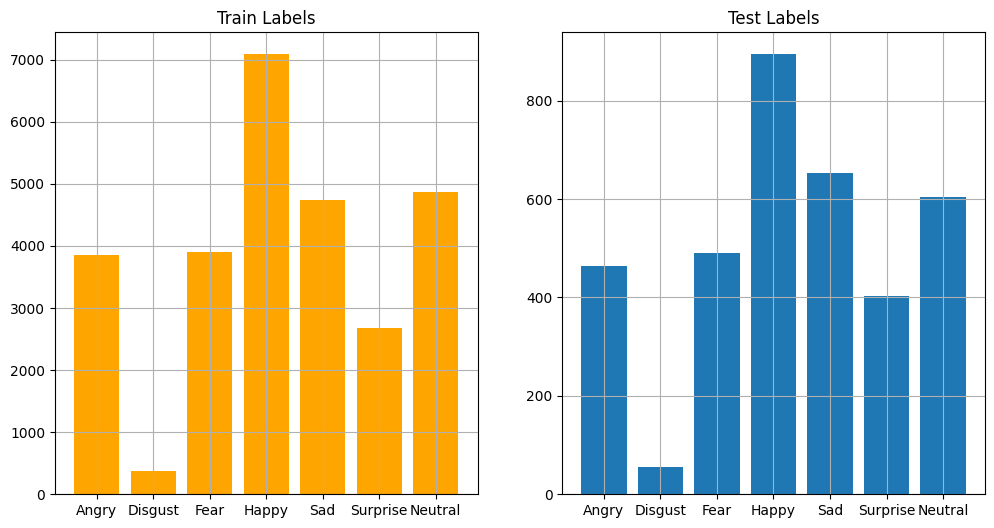

In [25]:
plot_compare_distributions(train_labels, test_labels, title1='Train Labels', title2='Test Labels')

Sample and visualize images from train/valid/test data sets

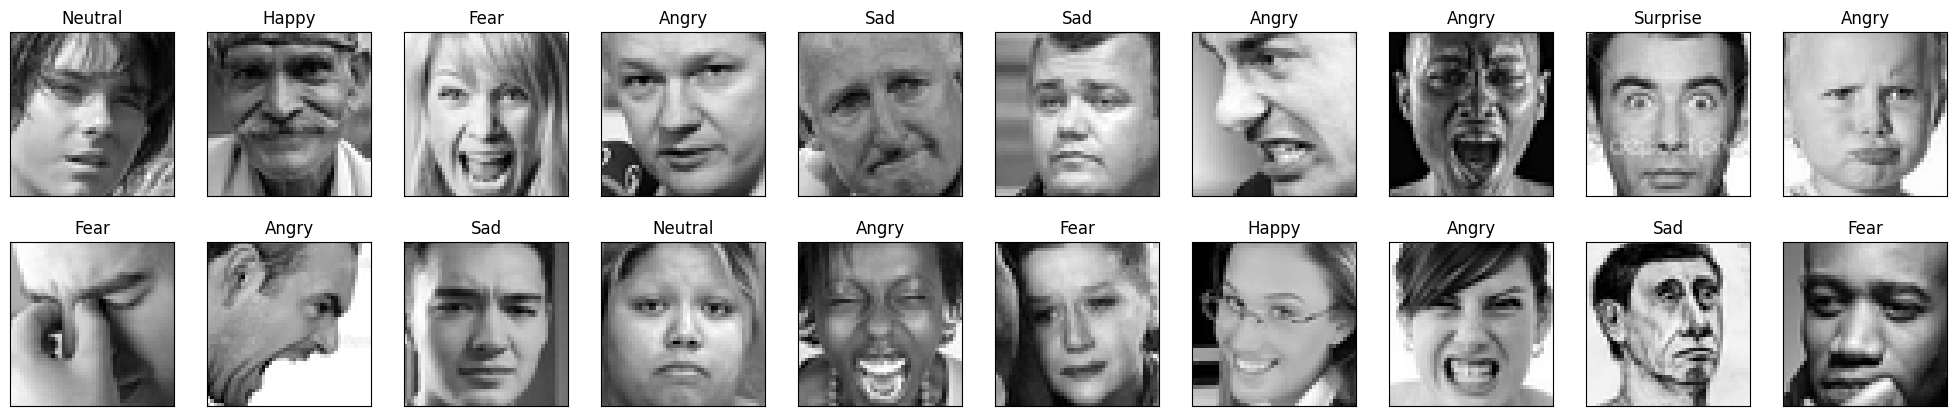

In [26]:
sample_plot(train_image_array1, train_image_label1)

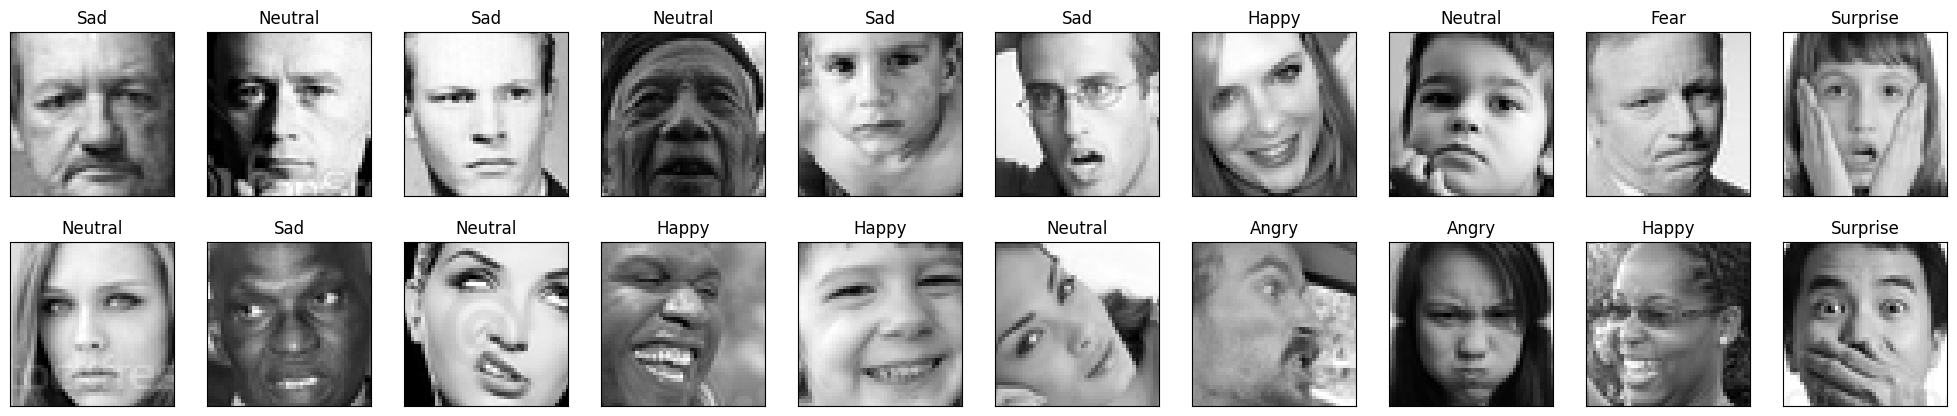

In [27]:
sample_plot(val_image_array, val_image_label)

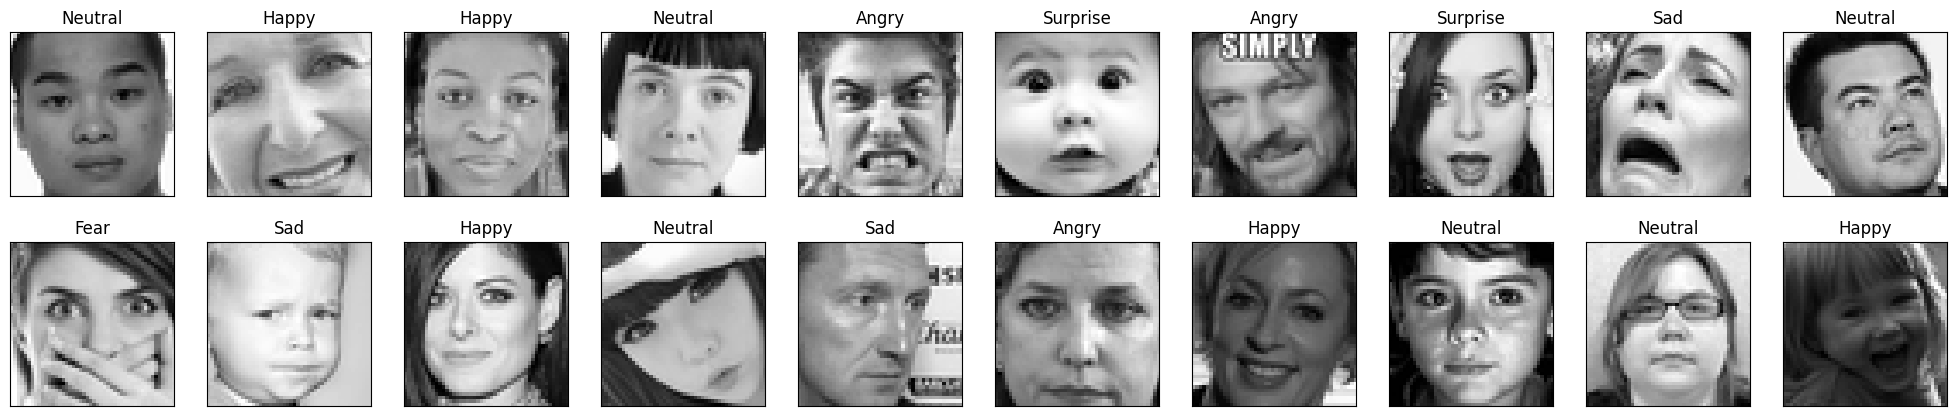

In [28]:
sample_plot(test_image_array, test_image_label)

In [29]:
wt = newdata[newdata[' Usage']=="Training"].groupby('emotion').agg('count')
# class_weights = 
wt['fraction'] = wt[' pixels']/np.sum(wt[' pixels'])
class_weights = dict(zip(range(7), wt.fraction))
class_weights

{0: 0.13988733418135563,
 1: 0.013846992549518445,
 2: 0.1420679629293113,
 3: 0.25756859894602946,
 4: 0.17201526440123568,
 5: 0.09747410503361803,
 6: 0.17713974195893148}

From the plot we see that happy emotion count is more in all three dataset while disgust being least in number.

## **Model Building**


In [30]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [31]:
# Implement me
# Make directory
directory = os.path.dirname(abspath_curr + '/ML_result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### **Setting Callbacks**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def callbackFunction(modelName):
  checkpoint = ModelCheckpoint(f"Checkpoints/{modelName}.h5", monitor = "val_accuracy", save_best_only = True, mode = "auto", verbose = 1)
  early_stopping = EarlyStopping(monitor = "val_accuracy", patience = 10, verbose = 1)
  callbacks = [early_stopping, checkpoint]
  return callbacks

In [33]:

# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/ML_result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=10)

# Custom Model 
 
- The system architecture for the given code is a Convolutional Neural Network (CNN) designed for image classification. It consists of multiple layers of convolution, pooling, dropout, batch normalization, and fully connected layers.
- The input shape for the CNN is (48,48,1), which represents a grayscale image of size 48x48 pixels.
- The first layer is a Conv2D layer with 128 filters of size (3,3) with ReLU activation function, 'same' padding, and the input shape. 
- The second Conv2D layer also has 128 filters of size (3,3) with ReLU activation function and 'same' padding. 
- The MaxPooling2D layer follows it with a pool size of (2,2) and a stride of (2,2). 
- The Dropout layer with 0.25 rate is added to reduce overfitting.
- BatchNormalization is applied before each convolutional layer to normalize the output of the previous layer. It helps to speed up the training process and avoid overfitting.
- The next three layers have similar structure, but the number of filters in each layer is doubled, starting with 256, then 512. 
- The last Conv2D layer has 512 filters of size (3,3), followed by MaxPooling2D and Dropout layer with a rate of 0.5.
- The output of the last convolutional layer is then flattened and fed into a fully connected layer with 512 units and ReLU activation function. 
- Dropout with a rate of 0.5 is applied to this layer to reduce overfitting. 
- The next fully connected layer also has 512 units with ReLU activation function and a Dropout layer with a rate of 0.5. 
- The final fully connected layer has 7 units with softmax activation function, which represents the 7 classes of the output.
- Overall, this architecture is deep and uses various techniques to reduce overfitting and improve performance.



In [34]:
cnn = models.Sequential()

cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(48,48,1)))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())

cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())

cnn.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

cnn.add(Flatten())

cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(7, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 256)       2

### **Training run 1**
Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights with 30 epoch and bach size of 256

In [35]:
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
%%time 
h1 = cnn.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb],
                    class_weight = class_weights,
                    epochs=30,
                    batch_size=256)

Epoch 1/30
108/108 [==============================] - 69s 400ms/step - loss: 0.3121 - accuracy: 0.2432 - val_loss: 1.8249 - val_accuracy: 0.2457 - lr: 0.0010
Epoch 2/30
108/108 [==============================] - 35s 323ms/step - loss: 0.2854 - accuracy: 0.2611 - val_loss: 1.8156 - val_accuracy: 0.2457 - lr: 0.0010
Epoch 3/30
108/108 [==============================] - 35s 327ms/step - loss: 0.2610 - accuracy: 0.3183 - val_loss: 1.6764 - val_accuracy: 0.3148 - lr: 0.0010
Epoch 4/30
108/108 [==============================] - 34s 318ms/step - loss: 0.2386 - accuracy: 0.3844 - val_loss: 1.6856 - val_accuracy: 0.3685 - lr: 0.0010
Epoch 5/30
108/108 [==============================] - 35s 324ms/step - loss: 0.2234 - accuracy: 0.4329 - val_loss: 1.4278 - val_accuracy: 0.4751 - lr: 0.0010
Epoch 6/30
108/108 [==============================] - 34s 318ms/step - loss: 0.2134 - accuracy: 0.4568 - val_loss: 1.4311 - val_accuracy: 0.4703 - lr: 0.0010
Epoch 7/30
108/108 [==============================] 

The traing run 1  had the early stop at epoch 23 with accusracy of 0.6643 with 0.001 learning rate

### **Accuracy**

In [37]:
train_loss, train_acc = cnn.evaluate(train_images, train_labels)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = cnn.evaluate(val_images, val_labels)
print('Validation Accuracy:', val_acc*100)

860/860 [==============================] - 13s 15ms/step - loss: 0.8089 - accuracy: 0.7167
Training Accuracy: 71.66999578475952


112/112 [==============================] - 2s 17ms/step - loss: 1.0800 - accuracy: 0.6122
Testing Accuracy: 61.22334599494934


112/112 [==============================] - 2s 18ms/step - loss: 1.0576 - accuracy: 0.6100
Validation Accuracy: 60.99608540534973


The accuracy for training run 1 is
- Training data 71.6
- Test data 61.22
- validation data 60.99

The testing accuracy is 61% which is better for the given dataset.

In [38]:
pred_test_labels = cnn.predict(test_images)

112/112 [==============================] - 2s 12ms/step


### **Prediction**

In [39]:
# Make directory
directory = os.path.dirname(abspath_curr + '/ML_result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

### **Plotting Learning curve for Training run 1**

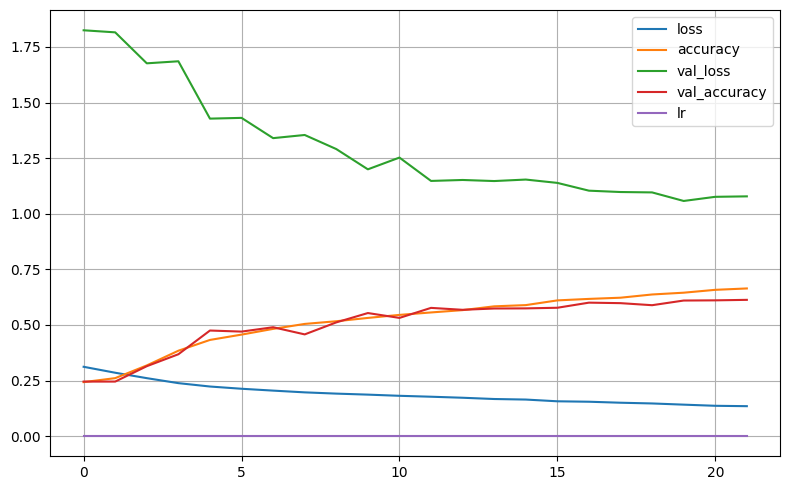

In [40]:
import pandas as pd

# Create a figure
pd.DataFrame(h1.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/ML_result/figure/learning_curve_cnn.pdf')
plt.show()

The accuracy is increasing in the learning curve where as the loss rate is decreasing.

### **Training run 2**
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights with 30 epoch and bach size of 256

In [41]:
cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
%%time 
h2 = cnn.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb],
                    class_weight = class_weights,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
860/860 [==============================] - 51s 52ms/step - loss: 0.1283 - accuracy: 0.6755 - val_loss: 1.0095 - val_accuracy: 0.6461 - lr: 1.0000e-04
Epoch 2/10
860/860 [==============================] - 43s 51ms/step - loss: 0.1190 - accuracy: 0.6967 - val_loss: 1.0118 - val_accuracy: 0.6354 - lr: 1.0000e-04
Epoch 3/10
860/860 [==============================] - 44s 51ms/step - loss: 0.1136 - accuracy: 0.7077 - val_loss: 1.0121 - val_accuracy: 0.6466 - lr: 1.0000e-04
CPU times: user 1min 44s, sys: 3.79 s, total: 1min 48s
Wall time: 2min 19s


The  traing run 2 had early stop  at epoch 3 with accusracy of 0.70 with 0.0001 learning rate

### **Accuracy**

In [43]:
train_loss, train_acc = cnn.evaluate(train_images, train_labels)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = cnn.evaluate(val_images, val_labels)
print('Validation Accuracy:', val_acc*100)

860/860 [==============================] - 11s 13ms/step - loss: 0.7011 - accuracy: 0.7626
Training Accuracy: 76.26385688781738


112/112 [==============================] - 2s 14ms/step - loss: 1.0453 - accuracy: 0.6291
Testing Accuracy: 62.906843423843384


112/112 [==============================] - 2s 14ms/step - loss: 1.0095 - accuracy: 0.6461
Validation Accuracy: 64.60548639297485


The accuracy for training run 2 is
- Training data 76.26
- Test data 62.9
- validation data 64.60

In [44]:
pred_test_labels1 = cnn.predict(test_images)

112/112 [==============================] - 1s 11ms/step


### **Plotting Learning curve for Training run 2**

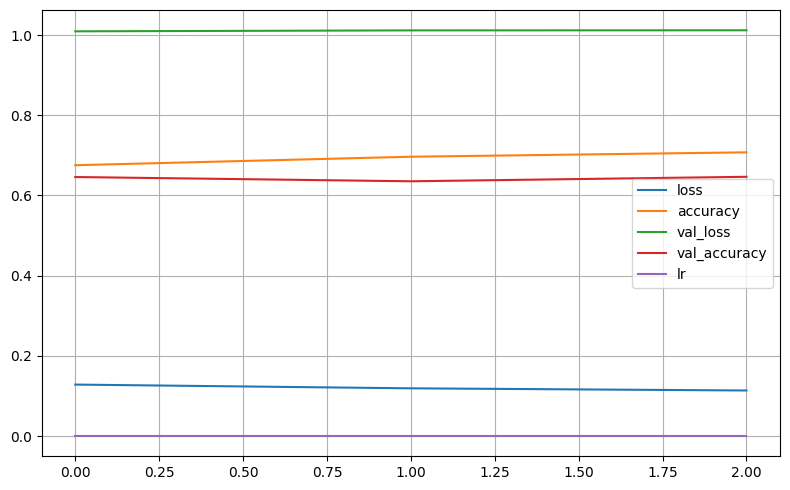

In [45]:
import pandas as pd

# Create a figure
pd.DataFrame(h2.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/ML_result/figure/learning_curve_cnn1.pdf')
plt.show()

The learning curve is almost flat since we did not have epoch results in training run 2 it was slight increase in accuracy vales and loss is almost fully flatten.

### **Training run 3**

Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights with 30 epoch and bach size of 256

In [46]:
cnn.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
%%time 
h3 = cnn.fit(train_images, train_labels,
                    validation_data=(val_images, val_labels),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb],
                    class_weight = class_weights,
                    epochs=30,
                    batch_size=256)

Epoch 1/30
108/108 [==============================] - 40s 317ms/step - loss: 0.1172 - accuracy: 0.6997 - val_loss: 1.0009 - val_accuracy: 0.6475 - lr: 1.0000e-05
Epoch 2/30
108/108 [==============================] - 35s 323ms/step - loss: 0.1165 - accuracy: 0.7043 - val_loss: 1.0006 - val_accuracy: 0.6477 - lr: 1.0000e-05
Epoch 3/30
108/108 [==============================] - 35s 323ms/step - loss: 0.1144 - accuracy: 0.7088 - val_loss: 0.9999 - val_accuracy: 0.6508 - lr: 1.0000e-05
Epoch 4/30
108/108 [==============================] - 35s 322ms/step - loss: 0.1147 - accuracy: 0.7049 - val_loss: 0.9991 - val_accuracy: 0.6489 - lr: 1.0000e-05
Epoch 5/30
108/108 [==============================] - 34s 313ms/step - loss: 0.1126 - accuracy: 0.7090 - val_loss: 0.9995 - val_accuracy: 0.6497 - lr: 1.0000e-05
Epoch 6/30
108/108 [==============================] - 35s 323ms/step - loss: 0.1139 - accuracy: 0.7069 - val_loss: 0.9984 - val_accuracy: 0.6491 - lr: 1.0000e-05
Epoch 7/30
108/108 [========

The  traing run 3 had early stop  at epoch 11 with accusracy of 0.70 with 0.0001 learning rate which is best model of all the training runs

### **Accuarcy**

In [48]:
train_loss, train_acc = cnn.evaluate(train_images, train_labels)
print('Training Accuracy:', train_acc*100)
print('\n')

test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('Testing Accuracy:', test_acc*100)
print('\n')

val_loss, val_acc = cnn.evaluate(val_images, val_labels)
print('Validation Accuracy:', val_acc*100)

860/860 [==============================] - 12s 14ms/step - loss: 0.6494 - accuracy: 0.7767
Training Accuracy: 77.67399549484253


112/112 [==============================] - 2s 14ms/step - loss: 1.0404 - accuracy: 0.6341
Testing Accuracy: 63.41189742088318


112/112 [==============================] - 2s 14ms/step - loss: 0.9977 - accuracy: 0.6480
Validation Accuracy: 64.80134129524231


The accuracy for training run 3 is
- Training data 0.77
- Test data 0.63
- validation data 0.64

In [49]:
pred_test_labels2 = cnn.predict(test_images)

112/112 [==============================] - 1s 11ms/step


### **Plotting Learning curve for Training run 3**

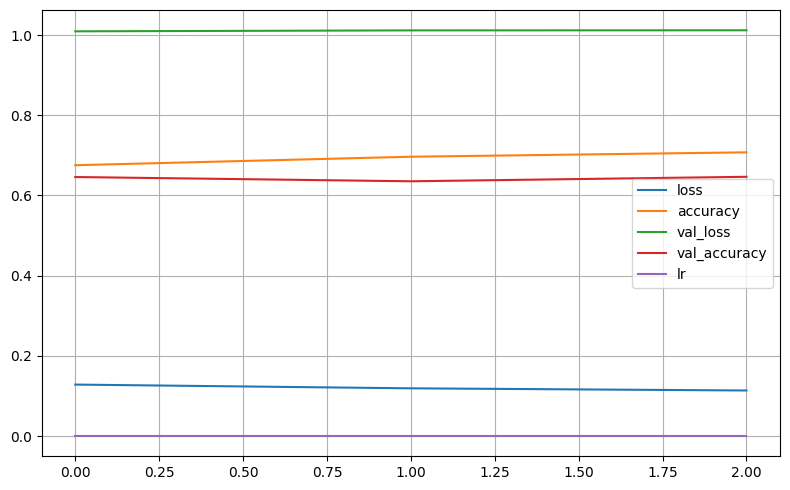

In [50]:
import pandas as pd

# Create a figure
pd.DataFrame(h2.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/ML_result/figure/learning_curve_cnn2.pdf')
plt.show()

The learning curve is almost flat since we did not have epoch results in training run 3 it was slight increase in accuracy vales and loss is almost fully flatten.

## **Analyzing the Results**

### **Training run 1**

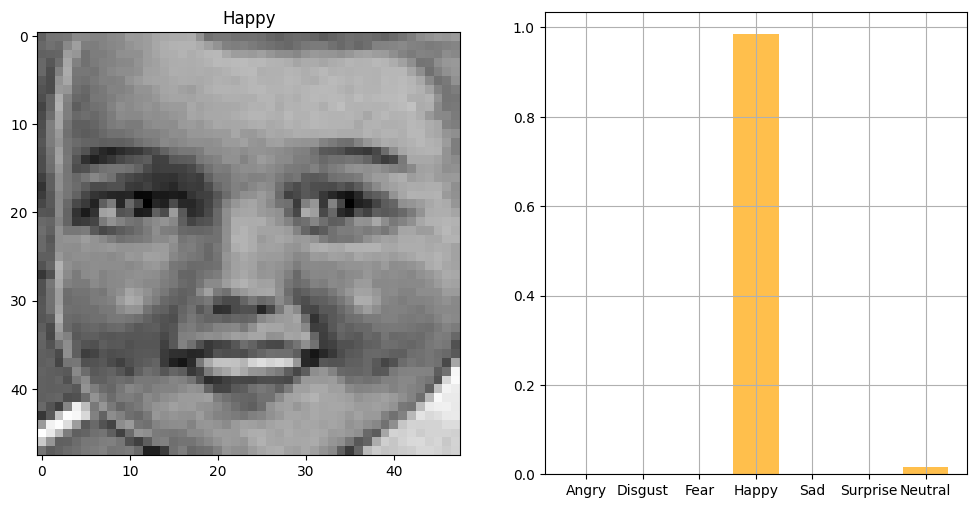

In [51]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 30)

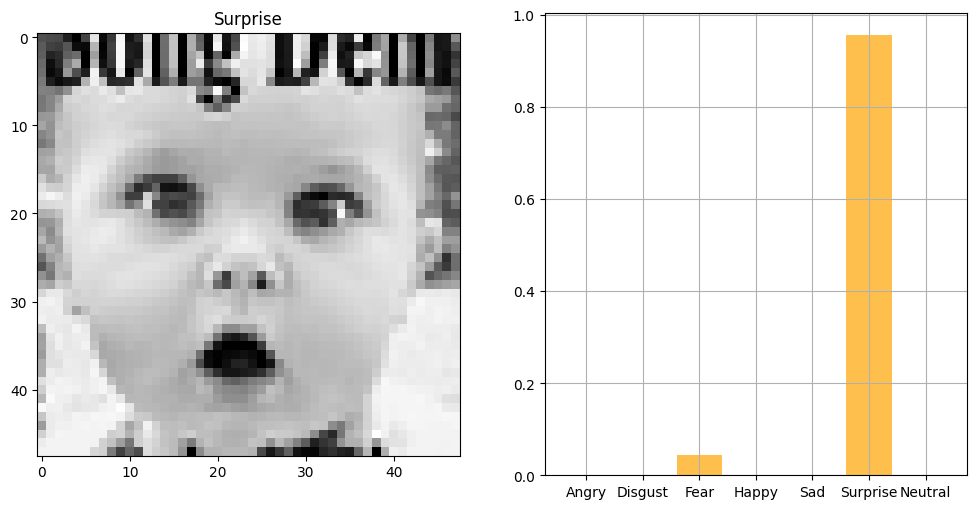

In [52]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,21)

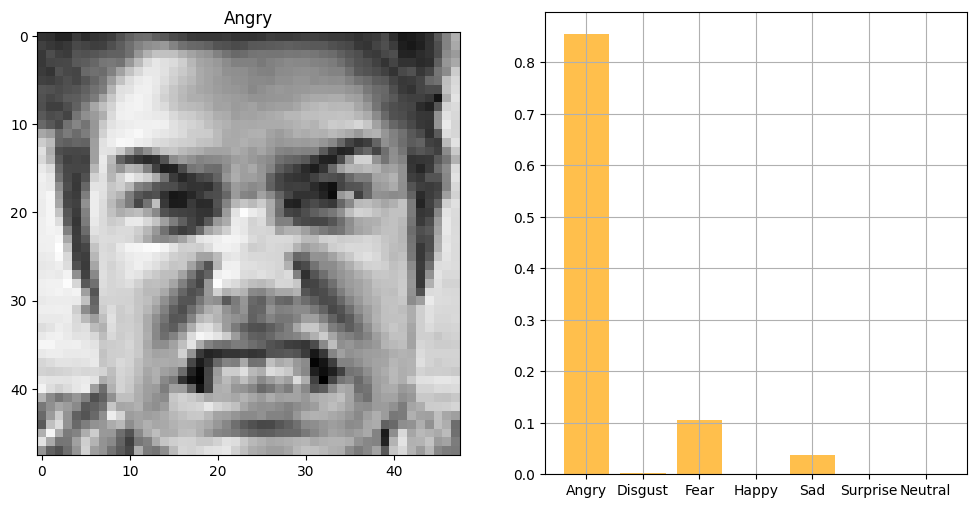

In [53]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,40)

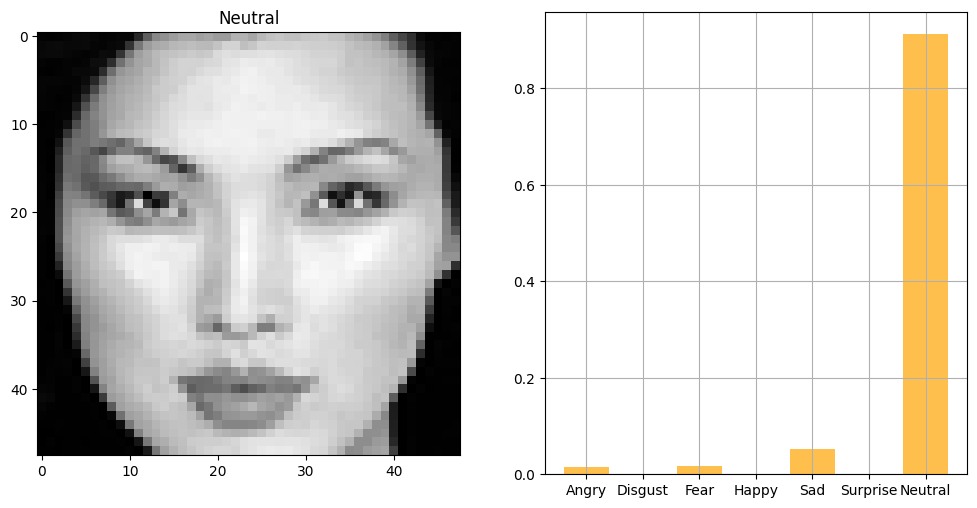

In [54]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,60)

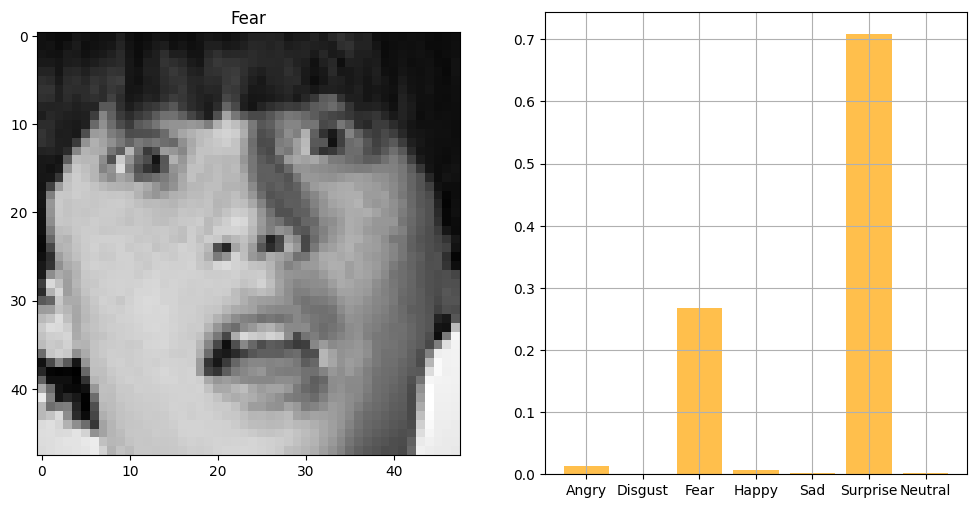

In [55]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,205)

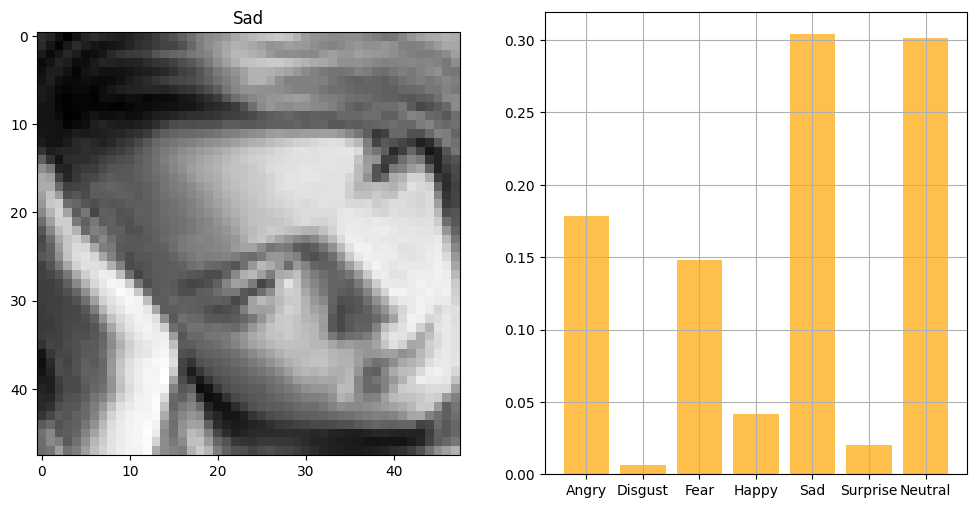

In [56]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,250)

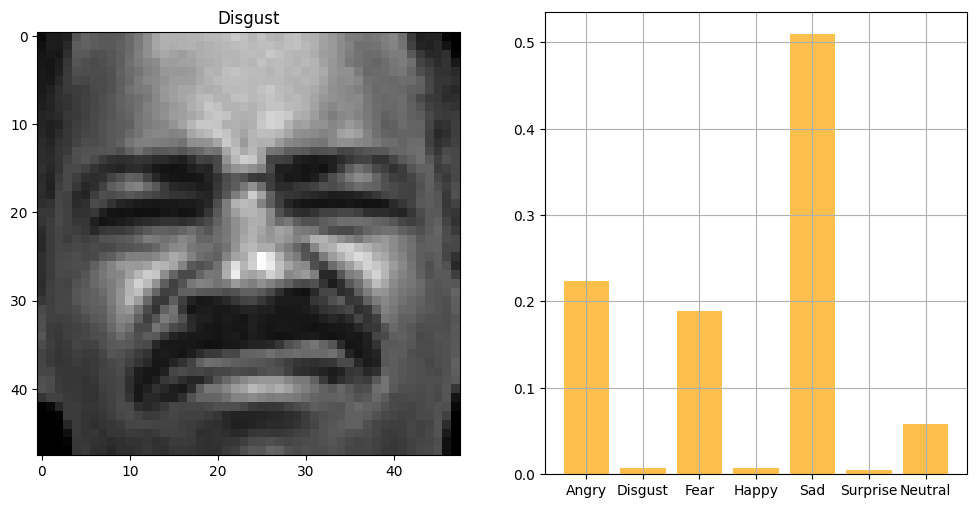

In [57]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels,230)

### **Training run 2**

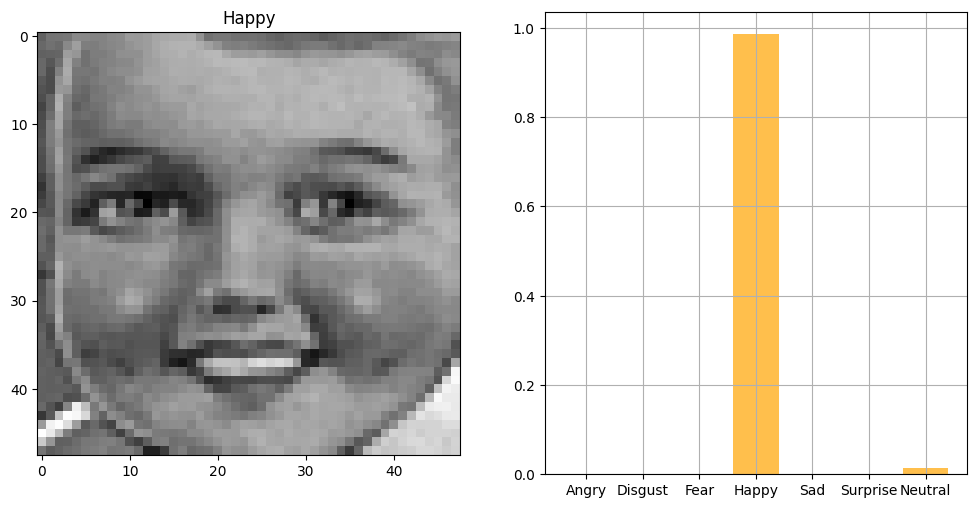

In [53]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1, 30)

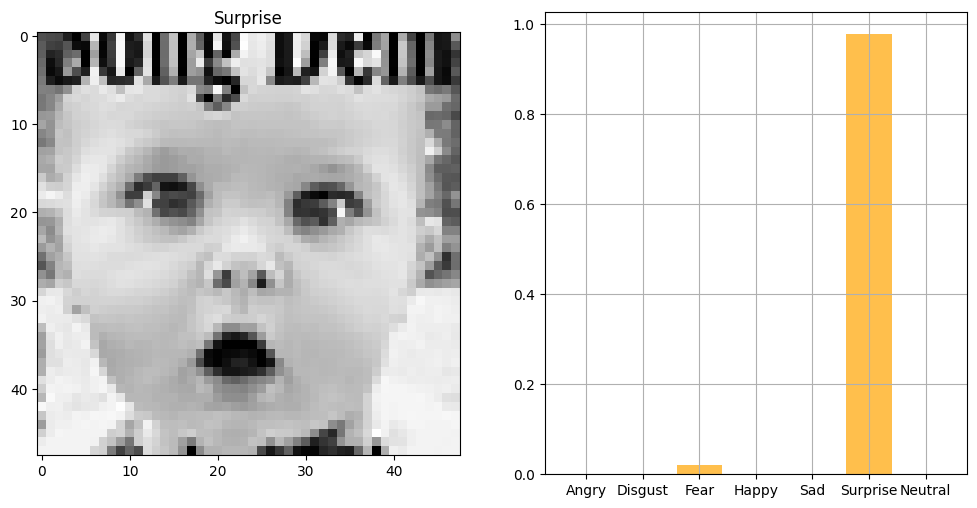

In [74]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,21)

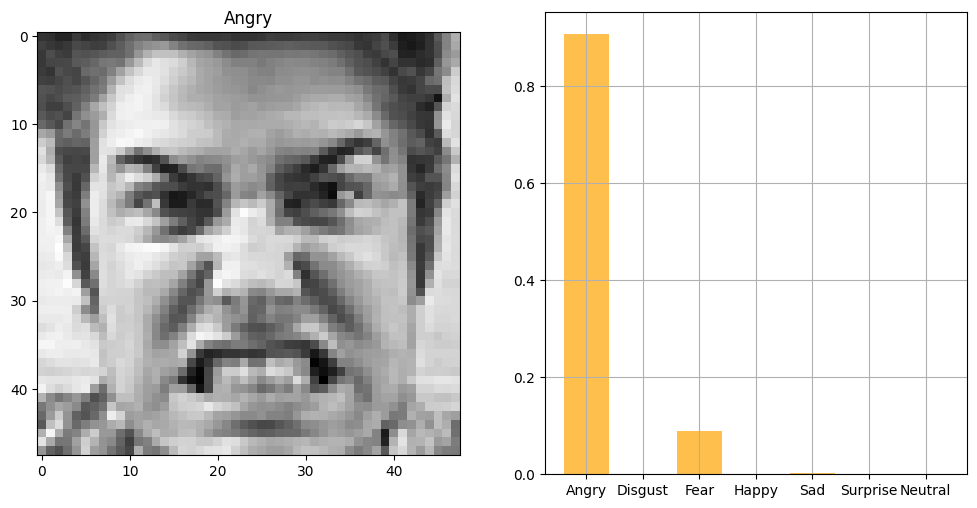

In [77]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,40)

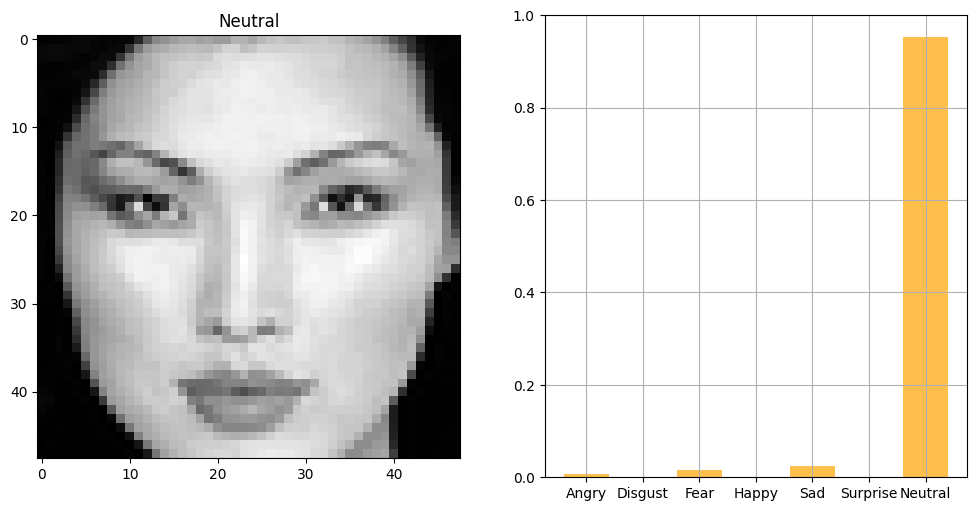

In [81]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,60)

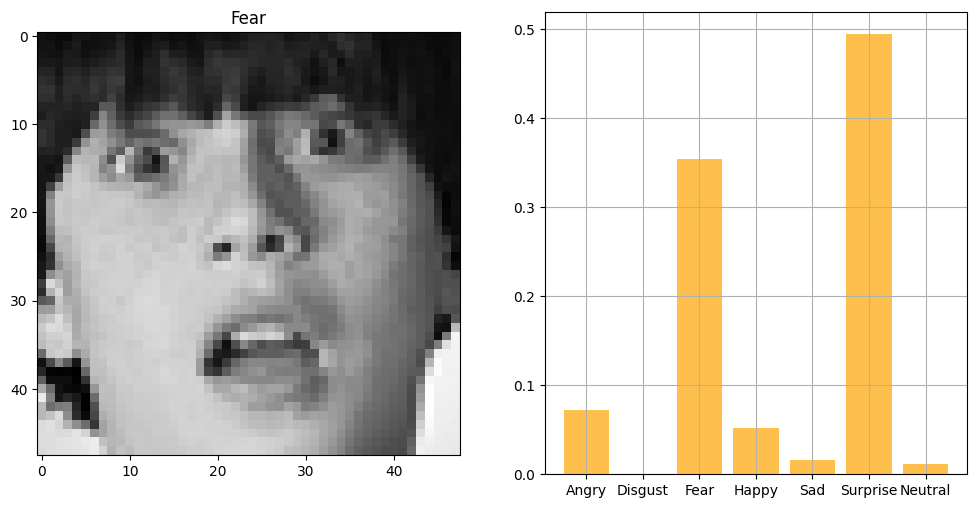

In [98]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,205)

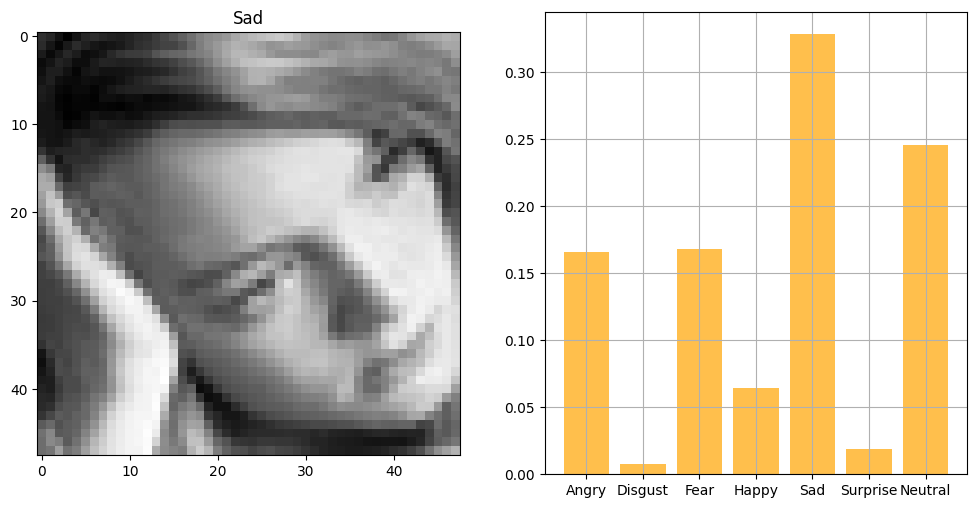

In [113]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,250)

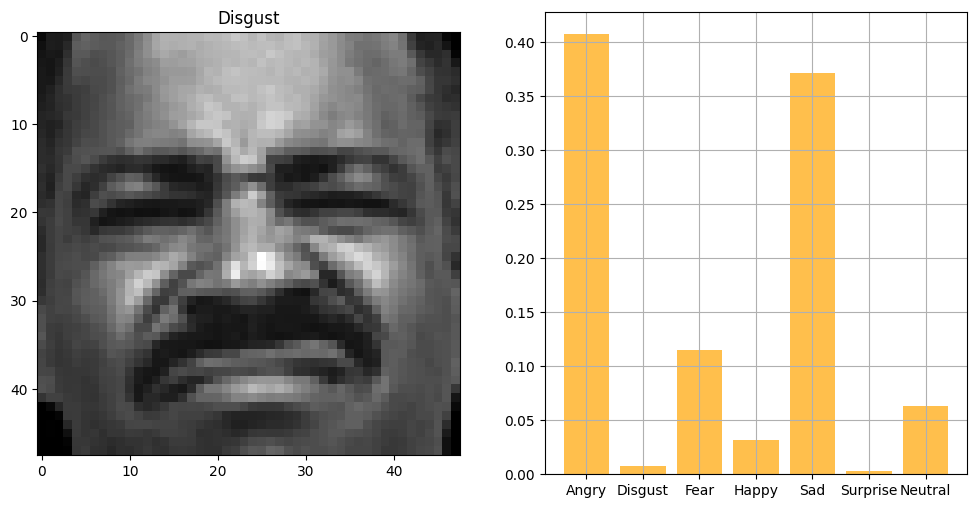

In [122]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels1,230)

### **Training run 3**

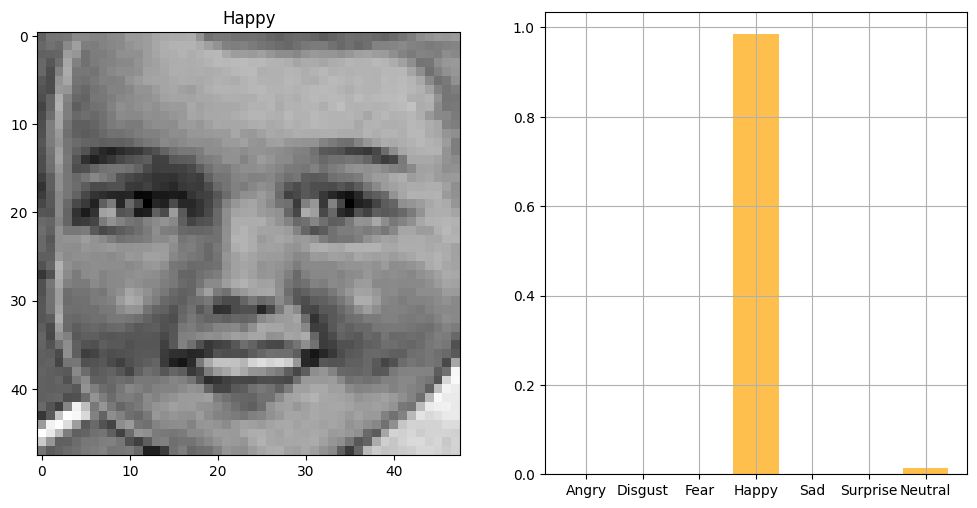

In [55]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2,30)

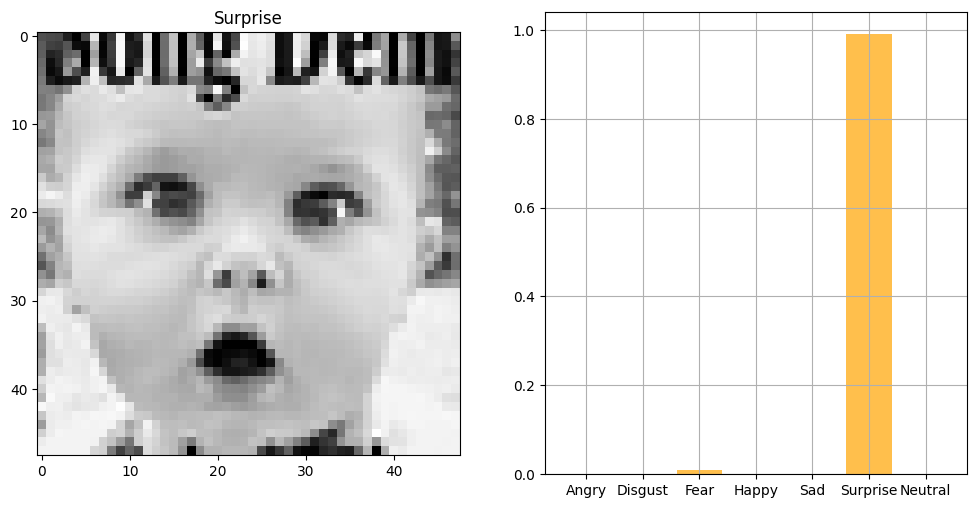

In [73]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 21)

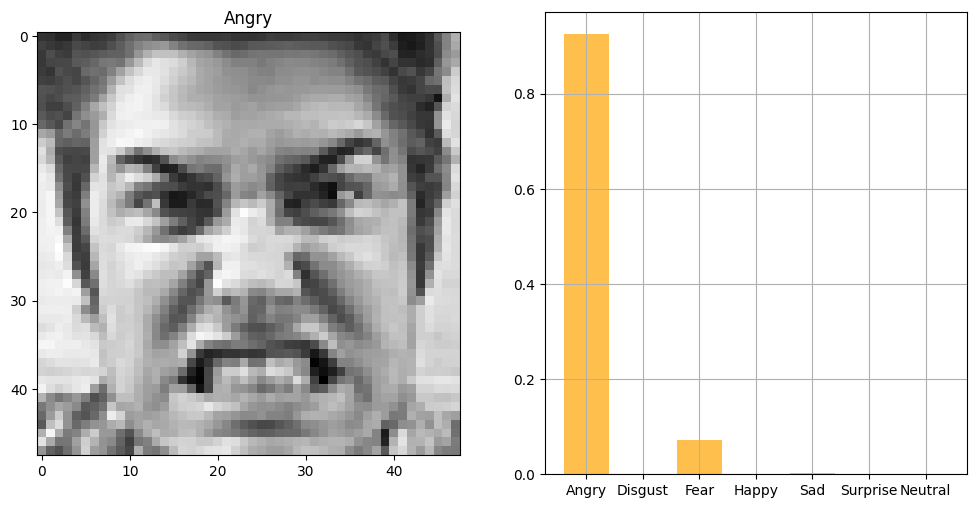

In [79]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 40)

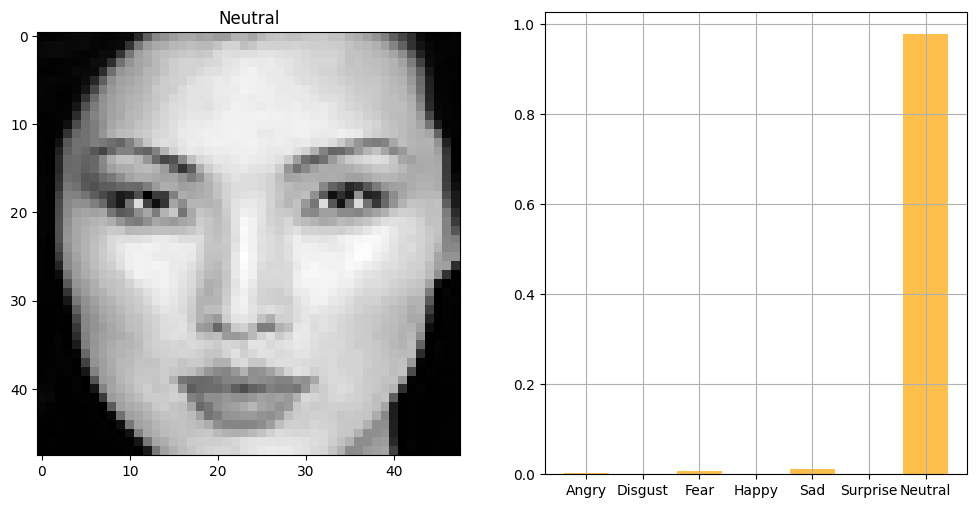

In [83]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 60)

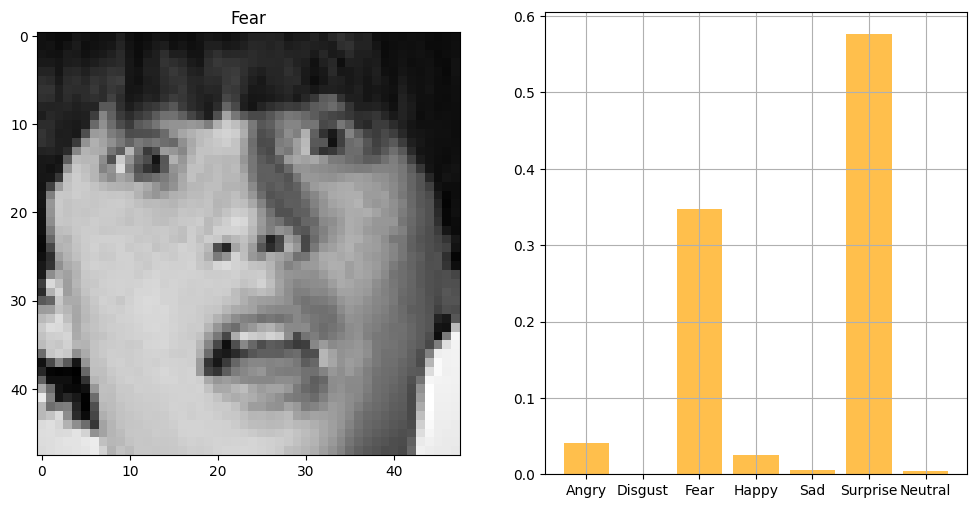

In [99]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 205)

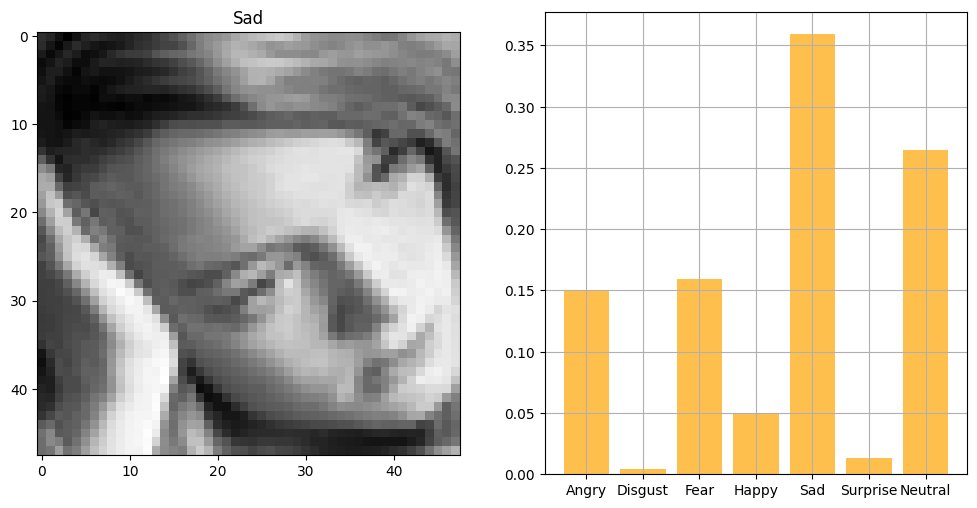

In [115]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 250)

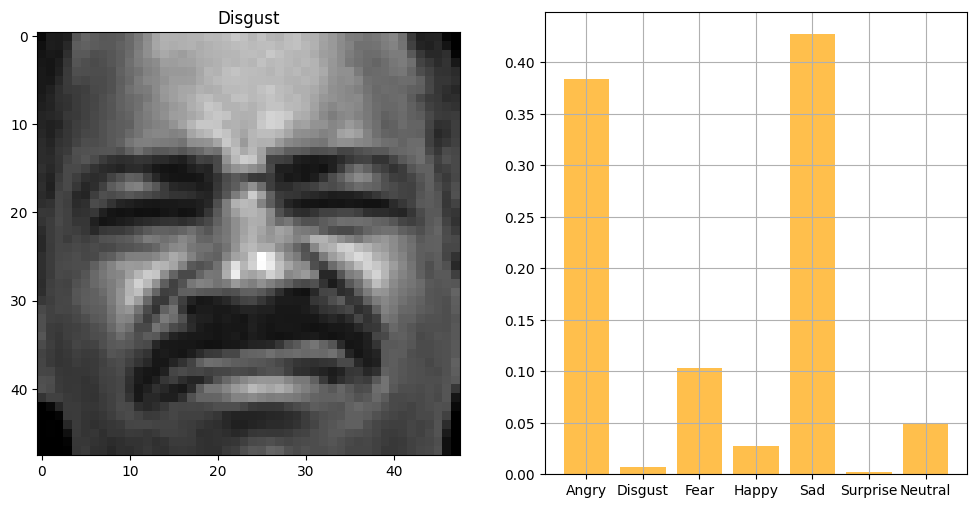

In [123]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels2, 230)

- First, we are analyzing the results with random test sample, we took sample 30 and found that the emotion is Happy, and it is predicted true in the  Training run 1,2, and 3. 
- Next, we checked with sample 21 and the emotion is Surprise and so on with 40 Angry and 60 Neutral and it is predicted true in the Training run 1,2, and 3.
- Whereas it is not predicted true with some discrepancies in case of Fear Sad, and Disgust. 


## **Predicted Label Comparision Plot**
### **Train run 1**

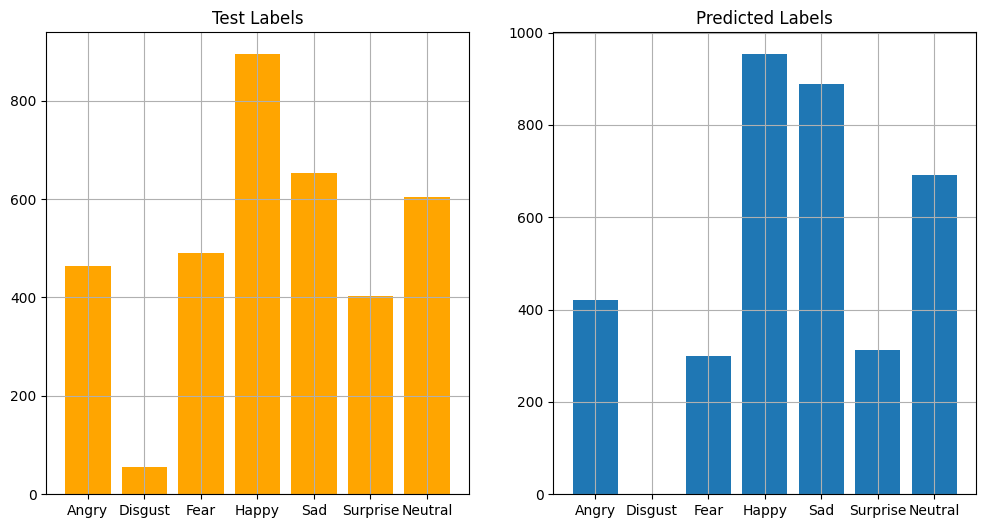

In [58]:
plot_compare_distributions(test_labels, pred_test_labels, title1='Test Labels', title2='Predicted Labels')

### **Train run 2**

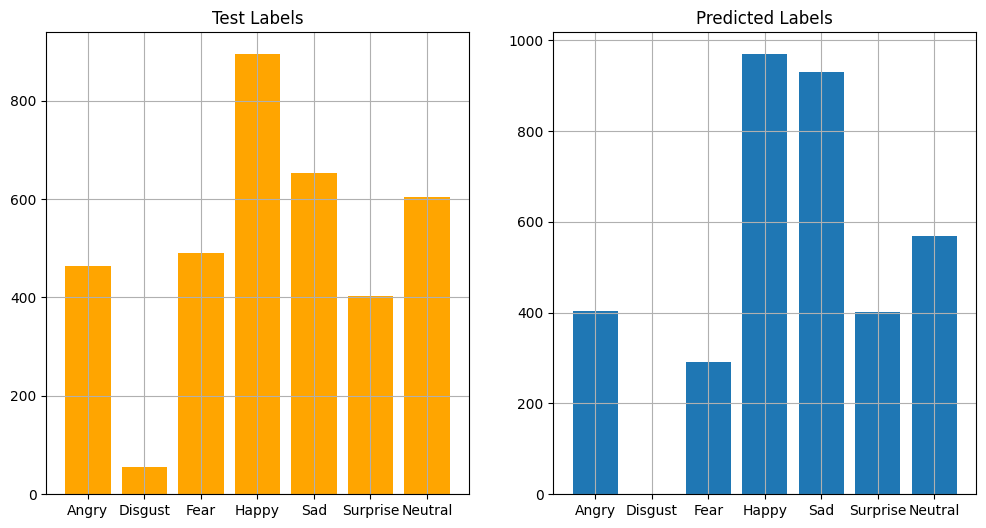

In [59]:
plot_compare_distributions(test_labels, pred_test_labels1, title1='Test Labels', title2='Predicted Labels')

### **Train run 3**

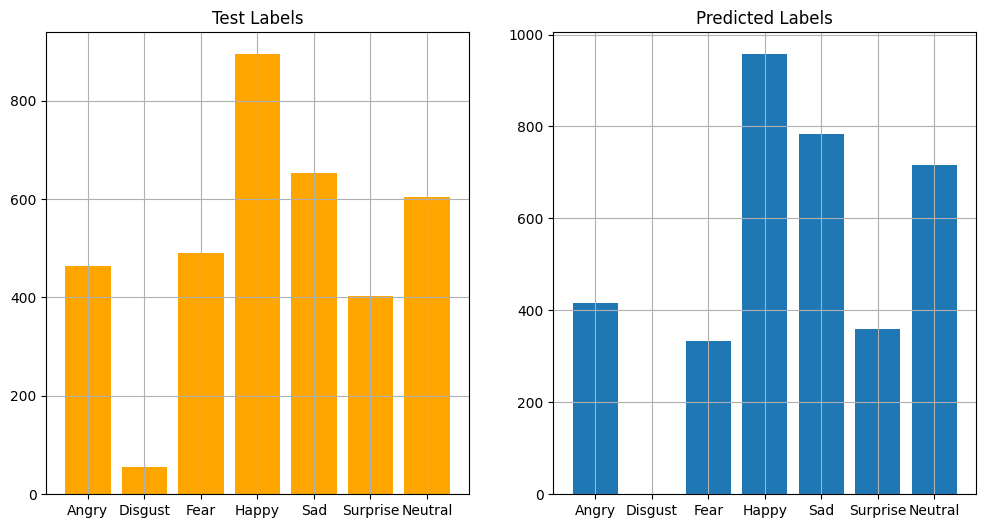

In [60]:
plot_compare_distributions(test_labels, pred_test_labels2, title1='Test Labels', title2='Predicted Labels')

- Now we show the Comparison Plot results for Training run 1,2, and 3 using the Test and Predicted Labels
- In case of Training run 1: The Test and Predicted Labels are having variations in giving exact emotions.
- It is slightly improved in Training run 2 in providing the true label prediction. 
- Training run 3 had the highest true label prediction and almost shows the exact emotions.

# Evaluating the model
Generate Test Predictions and Calculating Accuracy
Now that our model is build and trained we will generate test prediction. We see that our best accuracy is 0.63 or 63%.

In [61]:
test_prob = cnn.predict(test_images)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == test_image_label)

print(test_accuracy)

112/112 [==============================] - 1s 12ms/step
0.6341189674523008


# Confusion matrix
This is the first way we will use to evaluate our model. The confusion matrix is a table where every column represents the predicted label and the rows represent the true labe

Model 1

In [62]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

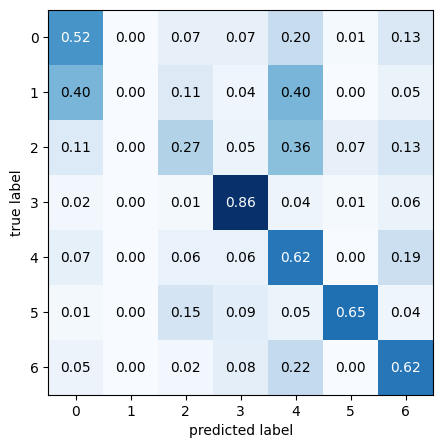

In [63]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                
                                figsize=(5, 5))
fig.show()




From confusion matrix  for training run 1 we see that Happy emtion has highest value for predicting true emotion while Fear is predicted as Sad hence we see some False positives

Model 2

In [64]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels1.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

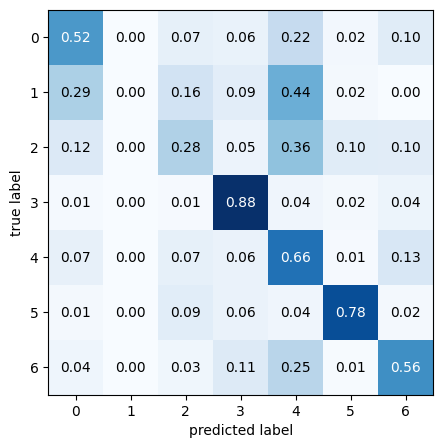

In [65]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels1.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                
                                figsize=(5, 5))
fig.show()

From confusion matrix for training run 2 we see that Happy emtion has highest value for predicting true emotion while Disgust is predicting most of the values as sad with False positives.

model 3

In [66]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels2.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

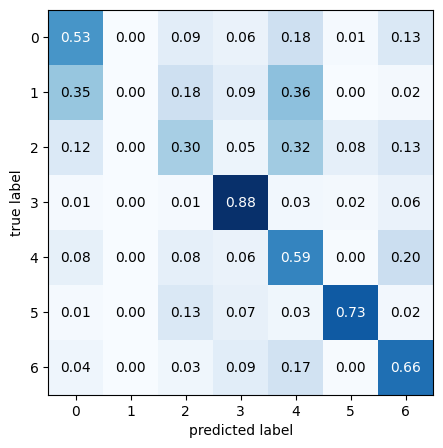

In [67]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels2.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                
                                figsize=(5, 5))
fig.show()

From confusion matrix for training run 3 we see that Happy emtion has highest value for predicting true emotion while Disgust is predicting most of the values as Angry

# Classification report

In [68]:
print(classification_report(test_image_label, test_pred, target_names=emotions.values()))

              precision    recall  f1-score   support

       Angry       0.60      0.53      0.56       464
     Disgust       0.00      0.00      0.00        55
        Fear       0.45      0.30      0.36       491
       Happy       0.82      0.88      0.85       894
         Sad       0.49      0.59      0.54       652
    Surprise       0.82      0.73      0.78       403
     Neutral       0.56      0.66      0.61       605

    accuracy                           0.63      3564
   macro avg       0.53      0.53      0.53      3564
weighted avg       0.62      0.63      0.62      3564



- From this classification report, we can see that the overall accuracy of the model is 62%, which means it correctly classified nearly 2209 out of 3564 images. 
- However, we need to examine the report more closely to see how well the model is performing on each individual class.
- For happy, the model has a precision of 0.82, recall of 0.86, and an F1-score of 0.84. This suggests that the model is performing well on this class and is able to accurately classify most images of happy.
- For angry, the model has a lower precision of 0.57 and recall of 0.53, indicating that it is struggling to correctly classify images of angry. The F1-score of 0.55 confirms that this is a relatively weak class for the model.
- For Sad, the model has a precision of 0.48, recall of 0.31, and an F1-score of 0.38, indicating that it is struggling to correctly classify images of Sad.
- Overall, the classification report suggests that the model is performing well on some classes (such as happy and surprise) but is struggling with others (such as fear and sad).

# Class Activation Maps
The second method we use to evaluate our model is the class activation map. This is a simple technique that shows the image region used by the CNN to identify the specific class. In this case the region is shown in a red color to highlight the area the model used ot predict the feeling.

In [69]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,self.model.output]
       )
           
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
            grads = tape.gradient(loss, convOutputs)

            castConvOutputs = tf.cast(convOutputs > 0, "float32")
            castGrads = tf.cast(grads > 0, "float32")
            guidedGrads = castConvOutputs * castGrads * grads
            convOutputs = convOutputs[0]
            guidedGrads = guidedGrads[0]

            weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
            cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

            (w, h) = (image.shape[2], image.shape[1])
            heatmap = cv2.resize(cam.numpy(), (w, h))
            numer = heatmap - np.min(heatmap)
            denom = (heatmap.max() - heatmap.min()) + eps
            heatmap = numer / denom
            heatmap = (heatmap * 255).astype("uint8")
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap = cv2.COLORMAP_VIRIDIS):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

1/1 [==============================] - 0s 23ms/step


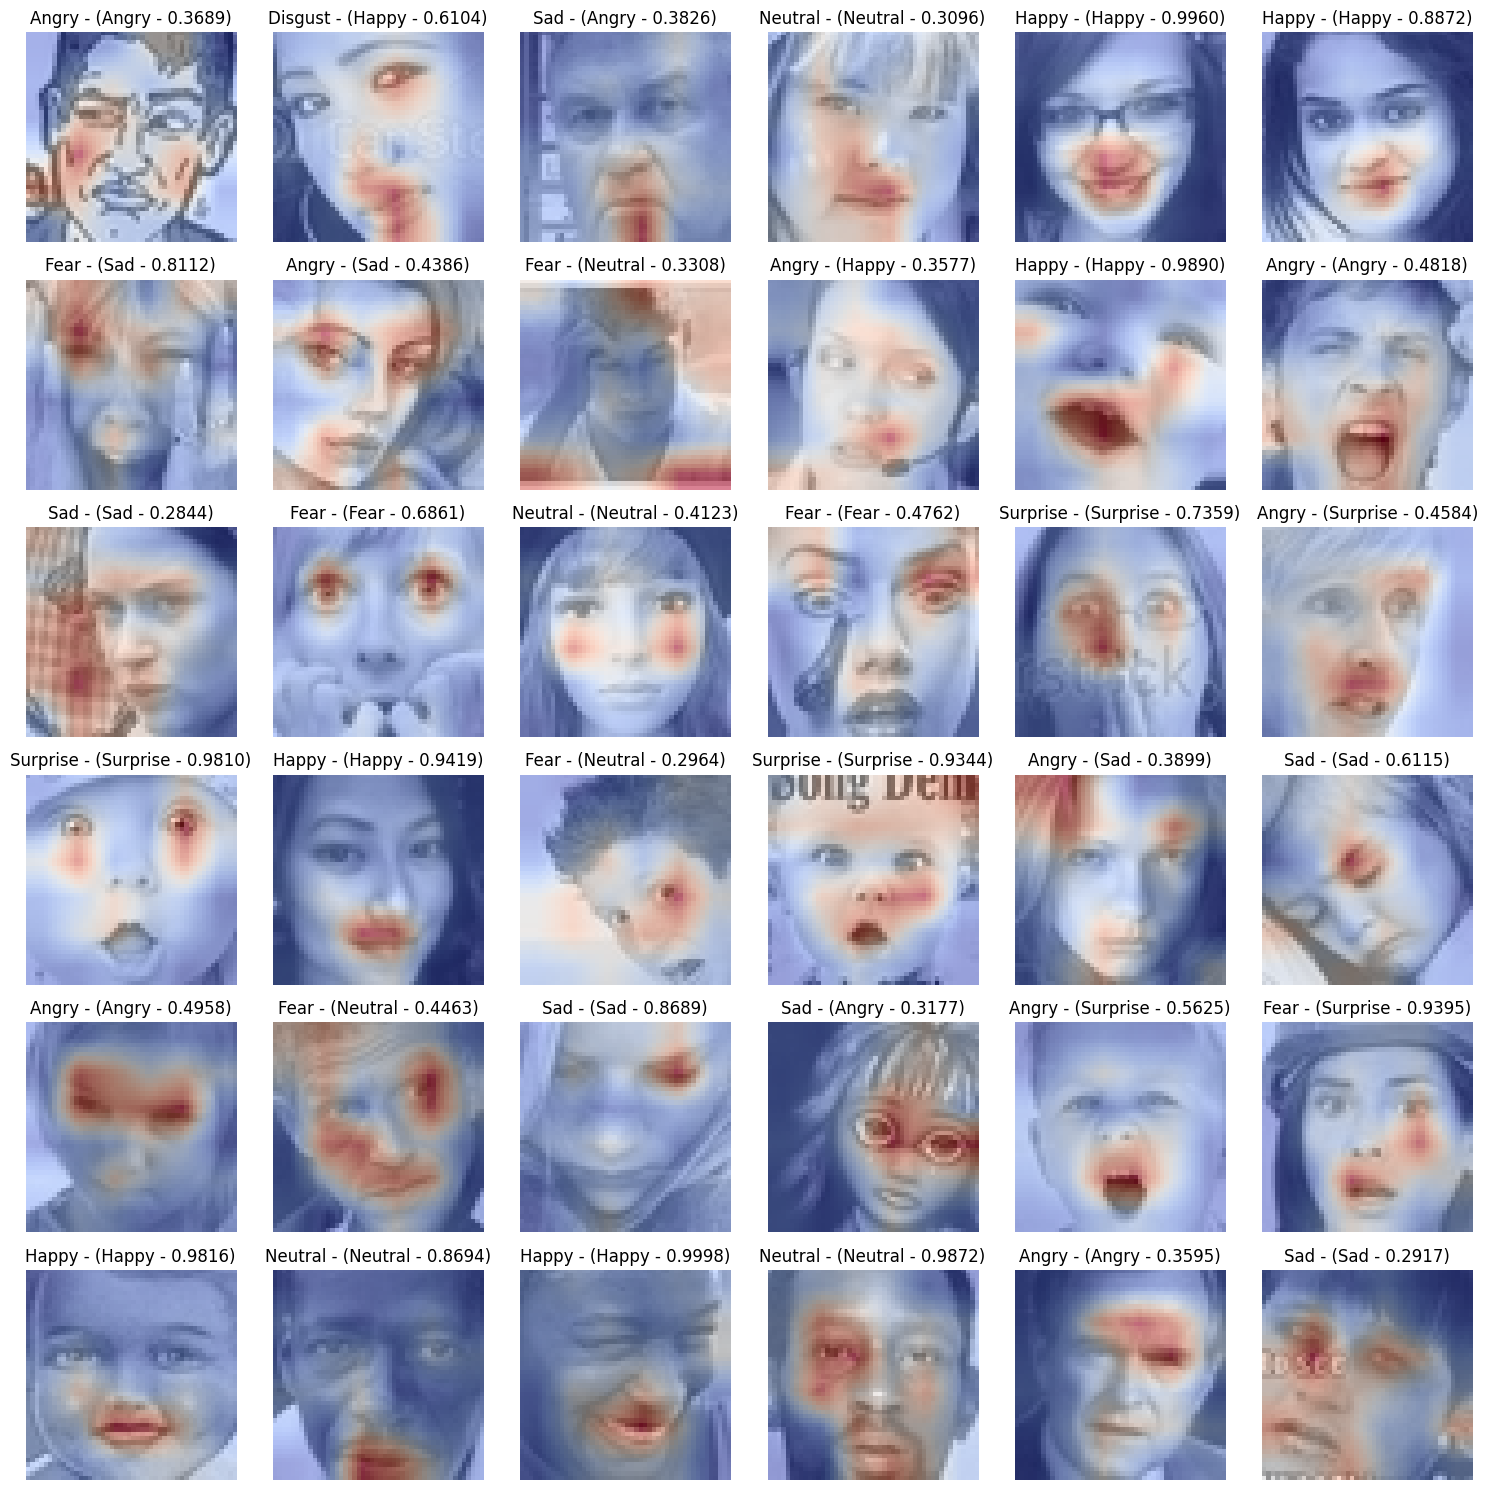

In [70]:
plt.figure(figsize=[15,15])
for i in range(36):
    img = test_images[i,:,:,0]
    p_dist = cnn.predict(img.reshape(1,48,48,1))
    k = np.argmax(p_dist)
    p = np.max(p_dist)

    cam = GradCAM(cnn, k)
    heatmap = cam.compute_heatmap(img.reshape(1,48,48,1))

    plt.subplot(6,6,i+1)
    plt.imshow(img, cmap='binary_r')
    plt.imshow(heatmap, alpha=0.5, cmap='coolwarm')
    plt.title(f'{emotions[test_image_label[i]]} - ({emotions[k]} - {p:.4f})')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()
            
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
        
    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,self.model.output]
       )
           
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
            grads = tape.gradient(loss, convOutputs)

            castConvOutputs = tf.cast(convOutputs > 0, "float32")
            castGrads = tf.cast(grads > 0, "float32")
            guidedGrads = castConvOutputs * castGrads * grads
            convOutputs = convOutputs[0]
            guidedGrads = guidedGrads[0]

            weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
            cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

            (w, h) = (image.shape[2], image.shape[1])
            heatmap = cv2.resize(cam.numpy(), (w, h))
            numer = heatmap - np.min(heatmap)
            denom = (heatmap.max() - heatmap.min()) + eps
            heatmap = numer / denom
            heatmap = (heatmap * 255).astype("uint8")
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap = cv2.COLORMAP_VIRIDIS):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

112/112 [==============================] - 1s 11ms/step


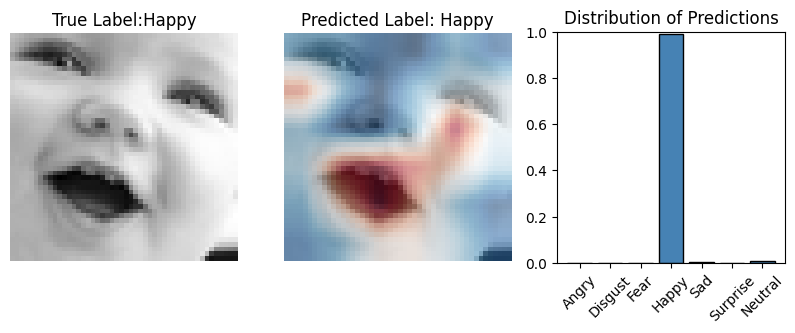

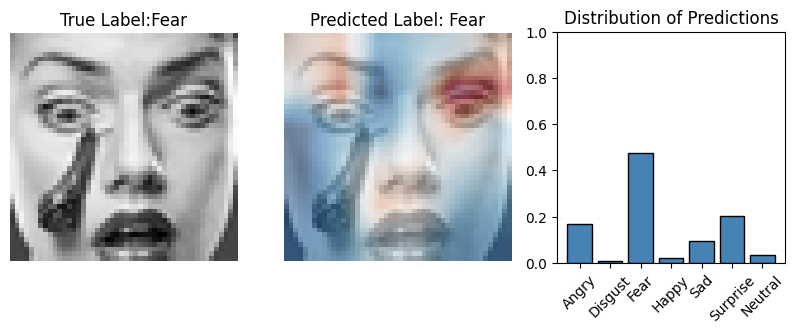

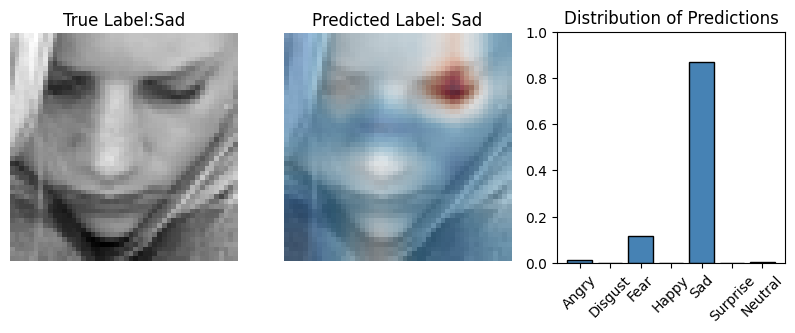

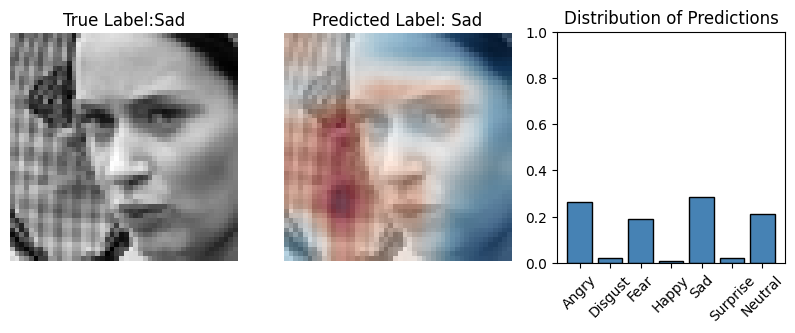

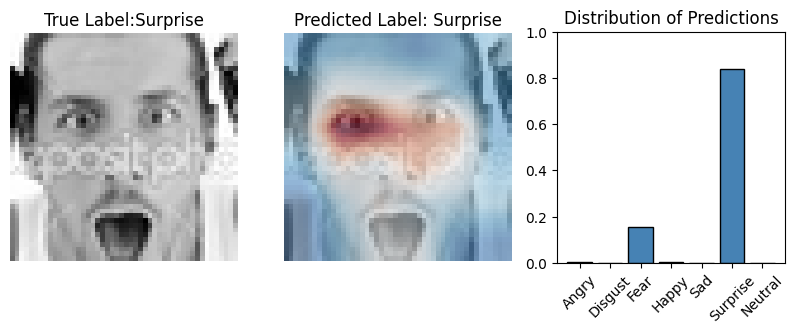

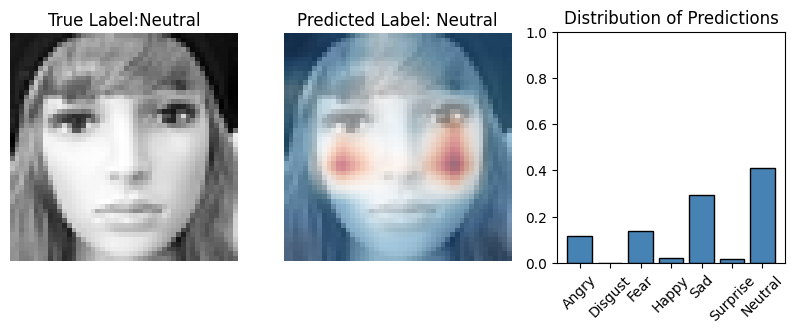

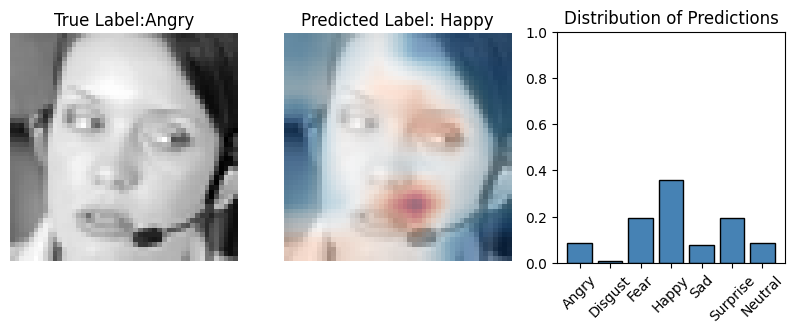

In [74]:
test_prob = cnn.predict(test_images)
test_pred = np.argmax(test_prob, axis=1)

sel_imgs = [10, 15, 26, 12, 64, 14, 9]

for n in sel_imgs:
    img = test_images[n,:,:,0]
    
    plt.figure(figsize=[10,3])
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='binary_r')
    plt.title(f'True Label:{emotions[test_image_label[n]]}')
    plt.axis('off')
    
    cam = GradCAM(cnn, test_pred[n])
    heatmap = cam.compute_heatmap(img.reshape(1,48,48,1))
    
    plt.subplot(1, 3, 2)
    plt.imshow(img, cmap='binary_r')
    plt.imshow(heatmap, alpha=0.5, cmap='RdBu_r')
    plt.title(f'Predicted Label: {emotions[test_pred[n]]}')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.bar(emotions.values(), test_prob[n, :], color='steelblue', edgecolor='k')
    plt.xticks(rotation=45)
    plt.ylim([0,1])
    plt.title('Distribution of Predictions')
    plt.show()

- This is a simple technique that shows the image region used by the CNN to identify the specific class.
- In this case the region is shown in a red color to highlight the area the model used to predict the feeling.
- These are some of the test results of the emotions.
True Labels (Happy Surprise Sad Neutral) and False Labels (Angry Fear Disgust)


# Top "K" accuracy
- This metric computes the number of times where the correct label is among the top k labels predicted (ranked by predicted scores). 
- So., by Top 0 accuracy we understand how many times the model was successful in predicting the right label in the first try with accuracy: 62%
- Top 1 accuracy shows us the number of times the correct label was one of the two prediction the model made with accuracy: 80%, and so on
- If we take the top-6 accuracy for this, the correct class only needs to be in the top six predicted classes to count. 
- As a result, despite the model not perfectly getting every problem, its top-6 accuracy is 100%!


In [73]:
ranked_pred = np.argsort(test_prob, axis=1)
for k in range(7):
    correct = test_image_label.reshape(-1,1) == ranked_pred[:, -(k+1):]
    top_k_acc = np.sum(correct) / len(test_image_label)
    print(f'Top {k} Accuracy: {top_k_acc}')

Top 0 Accuracy: 0.6341189674523008
Top 1 Accuracy: 0.8047138047138047
Top 2 Accuracy: 0.8947811447811448
Top 3 Accuracy: 0.9489337822671156
Top 4 Accuracy: 0.9789562289562289
Top 5 Accuracy: 0.9935465768799102
Top 6 Accuracy: 1.0


# **Conclusion**

- Emotions such as Happy,Surprise,Angry,Neutral class labels where predicted with high accuracy rate where as class labels Sad,Disgust,Fear had variations in giving exact emotions. 
- Training run 2 and 3 had highest true label prediction than Training run 1 while Training run 3 being best model using Random Sample test results.
- From this results gave the true prediction value for the emotions  Happy,Angry,Surprise,Fear,Sad which accuracy >60%,While is gave false prediction for disgust with class activae maps test method.
- Overall , accuracy of our CNN model is 63%,which is slightly better model for the given dataset.
- Model is able be predict Happy,Angry,Neutral,Surprise,Sad emotions with true prediction while the emotions such as Disgust,Fear is predicted as False label some times during testing
While evaluating our model out of 7 emotions our modelis able to predict exactly 5 lables with true results while other 2 with little bias rate.
- Finally facial expression recognition using deep neural networks is a challenging yet exciting area of research with many potential applications in areas such as human-computer interaction, emotion detection, and healthcare.